In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import necessary libraries**

In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# **Dataset directories**

In [6]:

base_dir = 'drive/MyDrive/archive (1)'
train_dir = os.path.join(base_dir, 'seg_train/seg_train')
test_dir = os.path.join(base_dir, 'seg_test/seg_test')  # For evaluation or validation

# **Data Visualization**

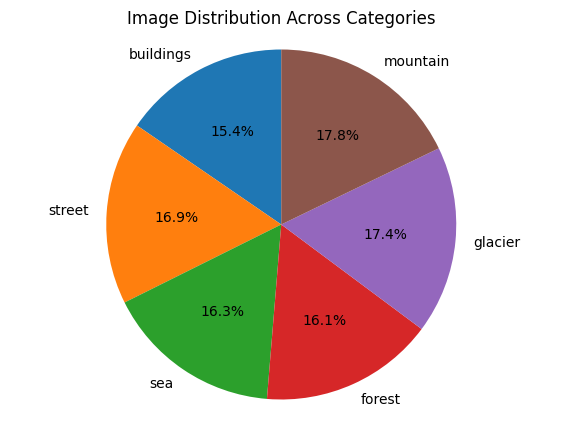

In [2]:
import matplotlib.pyplot as plt

# Given distribution of images across categories
categories_count = {
    'buildings': 2628,
    'street': 2883,
    'sea': 2784,
    'forest': 2745,
    'glacier': 2957,
    'mountain': 3037
}

# Extract labels (categories) and sizes (counts) from the distribution
labels = categories_count.keys()
sizes = categories_count.values()

# Create a pie chart
plt.figure(figsize=(7, 5))  # Specifies the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)  # Generates the pie chart with auto percentage, and starts the first section from the top
plt.axis('equal')  # Ensures the pie chart is circular by setting equal aspect ratio
plt.title('Image Distribution Across Categories')  # Adds a title to the pie chart
plt.show()  # Displays the pie chart


# **Preprocessing and data augmentation**

In [7]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # Use a validation split

test_datagen = ImageDataGenerator(rescale=1./255)

# **Data generators**

In [8]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


# **Load Pre-trained Model VGG16**

In [ ]:
# Load and configure the VGG16 model for transfer learning
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze the convolutional base

# **fine tuning of model**

In [ ]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # Assuming 6 classes in the dataset
])

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=50,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/10
50/50 [==============================] - 642s 13s/step - loss: 1.6865 - accuracy: 0.5063 - val_loss: 1.1600 - val_accuracy: 0.5106
Epoch 2/10
50/50 [==============================] - 606s 12s/step - loss: 0.9069 - accuracy: 0.6587 - val_loss: 0.7949 - val_accuracy: 0.6812
Epoch 3/10
50/50 [==============================] - 651s 13s/step - loss: 0.8121 - accuracy: 0.6963 - val_loss: 0.6982 - val_accuracy: 0.7350
Epoch 4/10
50/50 [==============================] - 598s 12s/step - loss: 0.7550 - accuracy: 0.7150 - val_loss: 0.6832 - val_accuracy: 0.7244
Epoch 5/10
50/50 [==============================] - 597s 12s/step - loss: 0.7506 - accuracy: 0.7156 - val_loss: 0.5959 - val_accuracy: 0.7819
Epoch 6/10
50/50 [==============================] - 608s 12s/step - loss: 0.7244 - accuracy: 0.7340 - val_loss: 0.5294 - val_accuracy: 0.8006
Epoch 7/10
50/50 [==============================] - 595s 12s/step - loss: 0.6783 - accuracy: 0.7300 - val_loss: 0.5169 - val_accuracy: 0.8131
Epoch 

# **Testing of Model**

In [ ]:
import cv2
import numpy as np
a=cv2.imread('/content/drive/MyDrive/archive (1)/seg_test/seg_test/glacier/20059.jpg')
a=cv2.resize(a,(150,150))/250
a=np.expand_dims(a,axis=0)


In [ ]:
predictions = model.predict(a)
predicted_class = np.argmax(predictions, axis =1)
print("Predicted class: ", predicted_class)

1/1 [==============================] - 0s 172ms/step
Predicted class:  [2]


# **Scratch_model**

In [9]:
# Simple CNN model for comparison
from tensorflow.keras import models, layers

# Define the VGG16 architecture from scratch
model_scratch = models.Sequential()

# Block 1
model_scratch.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model_scratch.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_scratch.add(layers.MaxPooling2D((2, 2)))

# Block 2
model_scratch.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_scratch.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_scratch.add(layers.MaxPooling2D((2, 2)))

# Block 3
model_scratch.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_scratch.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_scratch.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_scratch.add(layers.MaxPooling2D((2, 2)))

# Block 4
model_scratch.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model_scratch.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model_scratch.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model_scratch.add(layers.MaxPooling2D((2, 2)))

# Block 5
model_scratch.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model_scratch.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model_scratch.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model_scratch.add(layers.MaxPooling2D((2, 2)))

# Classification block
model_scratch.add(layers.Flatten())
model_scratch.add(layers.Dense(4096, activation='relu'))
model_scratch.add(layers.Dense(4096, activation='relu'))
model_scratch.add(layers.Dense(6, activation='softmax'))  # Assuming 6 classes for the classifier




In [10]:
model_scratch.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [11]:
history_scratch = model_scratch.fit(train_generator,
                                    steps_per_epoch=50,
                                    epochs=10,
                                    validation_data=validation_generator,
                                    validation_steps=50)


Epoch 1/10
50/50 [==============================] - 2454s 49s/step - loss: 1.8521 - accuracy: 0.1831 - val_loss: 1.7909 - val_accuracy: 0.1838
Epoch 2/10
50/50 [==============================] - 2020s 40s/step - loss: 1.7923 - accuracy: 0.1715 - val_loss: 1.7911 - val_accuracy: 0.1813
Epoch 3/10
50/50 [==============================] - 2027s 40s/step - loss: 1.7901 - accuracy: 0.1825 - val_loss: 1.7917 - val_accuracy: 0.1769
Epoch 4/10
50/50 [==============================] - 1966s 39s/step - loss: 1.7911 - accuracy: 0.1775 - val_loss: 1.7918 - val_accuracy: 0.1769
Epoch 5/10
50/50 [==============================] - 2011s 40s/step - loss: 1.7906 - accuracy: 0.1800 - val_loss: 1.7926 - val_accuracy: 0.1806
Epoch 6/10
50/50 [==============================] - 1970s 39s/step - loss: 1.7903 - accuracy: 0.1781 - val_loss: 1.7904 - val_accuracy: 0.1906
Epoch 7/10
50/50 [==============================] - 1952s 39s/step - loss: 1.7923 - accuracy: 0.1669 - val_loss: 1.7914 - val_accuracy: 0.1825

# **Scratch_model Testing**

In [ ]:
import cv2
import numpy as np
a=cv2.imread('/content/drive/MyDrive/archive (1)/seg_test/seg_test/buildings/20057.jpg')
a=cv2.resize(a,(150,150))/250
a=np.expand_dims(a,axis=0)


In [ ]:
predictions = model.predict(a)
predicted_class = np.argmax(predictions, axis =1)
print("Predicted class: ", predicted_class)

1/1 [==============================] - 0s 425ms/step
Predicted class:  [0]
